## Task-2: Data Insight

In [32]:
#import required libraries
import pandas as pd

In [33]:
rootDF_Transactions=pd.read_csv('G:\My Drive\KPMG\Task 2\Transactions_Done.csv')
rootDF_NewCustList=pd.read_csv(r'G:\My Drive\KPMG\Task 2\NewCustList_Done.csv')
rootDF_CustomerDemographic=pd.read_csv('G:\My Drive\KPMG\Task 2\CustomerDemographic_Done.csv')
rootDF_CustomerAddress=pd.read_csv('G:\My Drive\KPMG\Task 2\CustomerAddress_Done.csv')

## Copying and viewing all fours dataframe

In [34]:
dft=rootDF_Transactions.copy()
#dft.head()

In [35]:
dfncl=rootDF_NewCustList.copy()
#dfncl.head()

In [36]:
dfcd=rootDF_CustomerDemographic.copy()
#dfcd.head()

In [37]:
dfca=rootDF_CustomerAddress.copy()
#dfca.head()

## Renaming columns 

In [38]:
dfcd.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'age'],
      dtype='object')

Copying above column names for typing code below.

In [39]:
dfcd.rename(columns = {'customer_id':'Customer ID', 'first_name':'First name', 'last_name':'Last name', 'gender':'Gender',
       'past_3_years_bike_related_purchases':'Purchase in last 3 years', 'DOB':'Birth date', 'job_title':'Job title',
       'job_industry_category':'Job sector', 'wealth_segment':'Wealth segment', 'deceased_indicator':'Deceased indicator',
       'default':'default', 'owns_car':'Owns car', 'tenure':'Tenure', 'age':'Age'}, inplace = True)

In [40]:
dfcd.columns #Checking if column names are changed as they are desired

Index(['Customer ID', 'First name', 'Last name', 'Gender',
       'Purchase in last 3 years', 'Birth date', 'Job title', 'Job sector',
       'Wealth segment', 'Deceased indicator', 'default', 'Owns car', 'Tenure',
       'Age'],
      dtype='object')

## Removing missing values 

In [41]:
dfcd.isnull().sum() #Viewing sum of missing values in each column

Customer ID                   0
First name                    0
Last name                   125
Gender                        0
Purchase in last 3 years      0
Birth date                   87
Job title                   506
Job sector                  656
Wealth segment                0
Deceased indicator            0
default                     301
Owns car                      0
Tenure                       87
Age                          87
dtype: int64

In [42]:
df_2=dfcd.dropna(subset = ['Last name','Birth date','Job title','default','Tenure','Age'])
df_2.shape

(3139, 14)

Removed all missing values except the missing values from the Job Sector. Below is that is checked.

In [43]:
df_2.isnull().sum()

Customer ID                   0
First name                    0
Last name                     0
Gender                        0
Purchase in last 3 years      0
Birth date                    0
Job title                     0
Job sector                  509
Wealth segment                0
Deceased indicator            0
default                       0
Owns car                      0
Tenure                        0
Age                           0
dtype: int64

Removing all issing values from the data frame

In [13]:
df_removeAllNull=dfcd.dropna()
df_removeAllNull.shape

(2630, 14)

## Let's learn groupby

In [14]:
df1=dfcd.groupby('Gender').agg({'Customer ID':'count'}).reset_index() #aggregate by d1 #in order to make df1 DataFrame, .reset_index() is necessary
df1

,Gender,Customer ID
0,F,2039
1,M,1873
2,U,87


Aggregation (.agg())    Description
count() 	          Total number of items
first(), last() 	  First and last item
mean(), median() 	  Mean and median
min(), max() 	      Minimum and maximum
std(), var() 	      Standard deviation and variance
mad() 	              Mean absolute deviation
prod() 	              Product of all items
sum() 	              Sum of all items

In [15]:
df2=dfcd.groupby('Gender').agg({'Purchase in last 3 years':'sum'}).reset_index()
df2

,Gender,Purchase in last 3 years
0,F,98359
1,M,93483
2,U,3659


In [16]:
df3=dfcd.groupby(['Wealth segment','Gender']).agg({'Customer ID':'count'}).reset_index() #when doing groupby with more than one variable, write in square bracket
df3

,Wealth segment,Gender,Customer ID
0,Affluent Customer,F,481
1,Affluent Customer,M,481
2,Affluent Customer,U,16
3,High Net Worth,F,514
4,High Net Worth,M,482
5,High Net Worth,U,25
6,Mass Customer,F,1044
7,Mass Customer,M,910
8,Mass Customer,U,46


In [17]:
df_removeAllNull_2=df_removeAllNull.groupby('Job sector').agg({'Customer ID':'count'}).reset_index()
df_removeAllNull_2

,Job sector,Customer ID
0,Argiculture,91
1,Entertainment,110
2,Financial Services,626
3,Health,496
4,IT,119
5,Manufacturing,635
6,Property,222
7,Retail,278
8,Telecommunications,53


In [18]:
categorical=['Job sector','Wealth segment', 'Owns car']
for i in categorical:
    df4=dfcd.groupby([i,'Gender']).agg({'Customer ID':'count','Purchase in last 3 years':'sum'}).reset_index()
    print(df4)

            Job sector Gender  Customer ID  Purchase in last 3 years
0          Argiculture      F           57                      2944
1          Argiculture      M           56                      3001
2        Entertainment      F           67                      3082
3        Entertainment      M           69                      3238
4   Financial Services      F          392                     18294
5   Financial Services      M          375                     18870
6   Financial Services      U            7                       329
7               Health      F          303                     14627
8               Health      M          293                     15229
9               Health      U            6                       198
10                  IT      F           79                      3806
11                  IT      M           72                      3625
12                  IT      U           71                      2981
13       Manufacturing      F     

## Bar chart (One by One)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

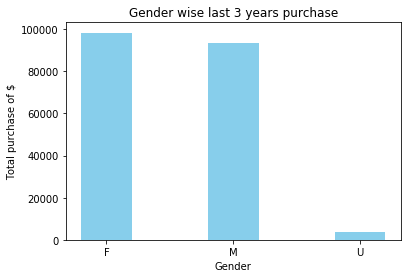

In [20]:
plt.bar(df2['Gender'], df2['Purchase in last 3 years'], color ='skyblue',width = 0.4)
plt.xlabel("Gender")
plt.ylabel("Total purchase of $")
plt.title("Gender wise last 3 years purchase")
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

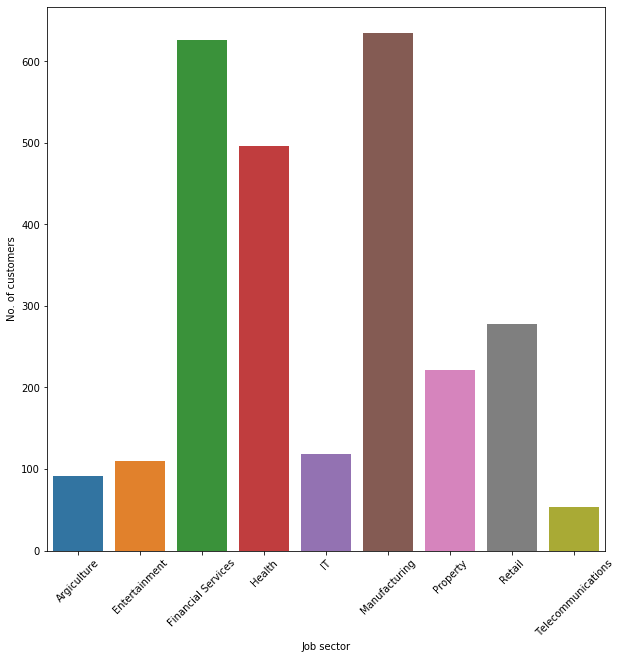

In [21]:
fig=plt.figure(figsize=(10,10))
JobSector=sns.barplot(data=df_removeAllNull_2,x='Job sector',y='Customer ID').set(xlabel='Job sector', ylabel='No. of customers')
plt.xticks(rotation=45)
#plt.xticks(rotation='vertical')
#JobSector.set_rotation('Job sector',rotation=45)

[Text(0, 0.5, 'No. of customers'), Text(0.5, 0, 'Wealth segment')]

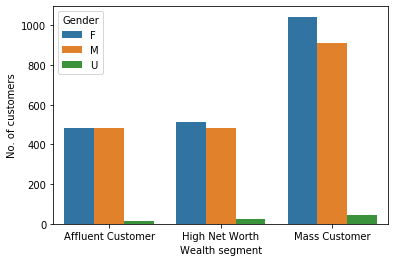

In [22]:
sns.barplot(data=df3,x='Wealth segment',y='Customer ID', hue='Gender').set(xlabel='Wealth segment', ylabel='No. of customers')

## Bar chart (All categorical data together)

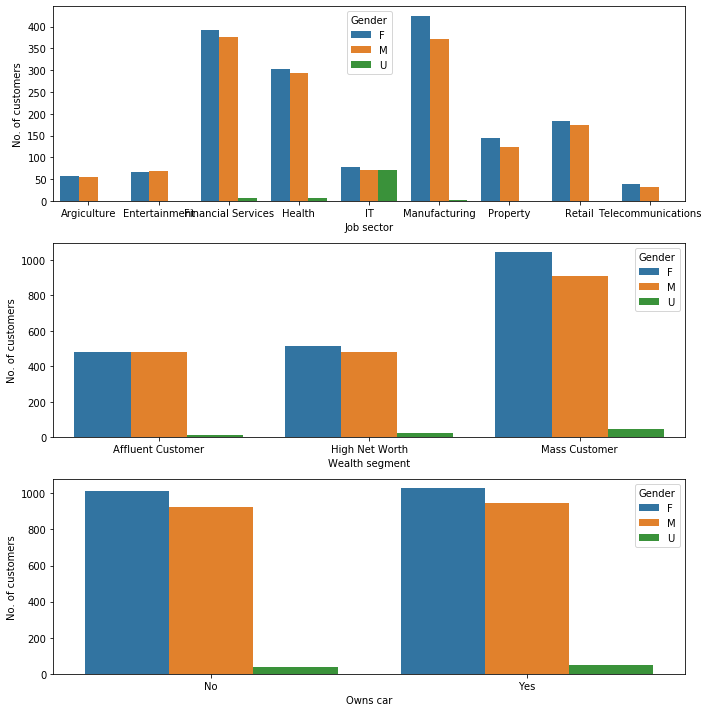

In [23]:
a=3
b=1
c=1
fig = plt.figure(figsize=(10,10))
categorical=['Job sector','Wealth segment', 'Owns car']
for i in categorical:
    df4=dfcd.groupby([i,'Gender']).agg({'Customer ID':'count','Purchase in last 3 years':'sum'}).reset_index()
    plt.subplot(a,b,c)
    sns.barplot(data=df4,x=i,y='Customer ID', hue='Gender').set(xlabel=i, ylabel='No. of customers')
    c=c+1
plt.tight_layout()
plt.show() 

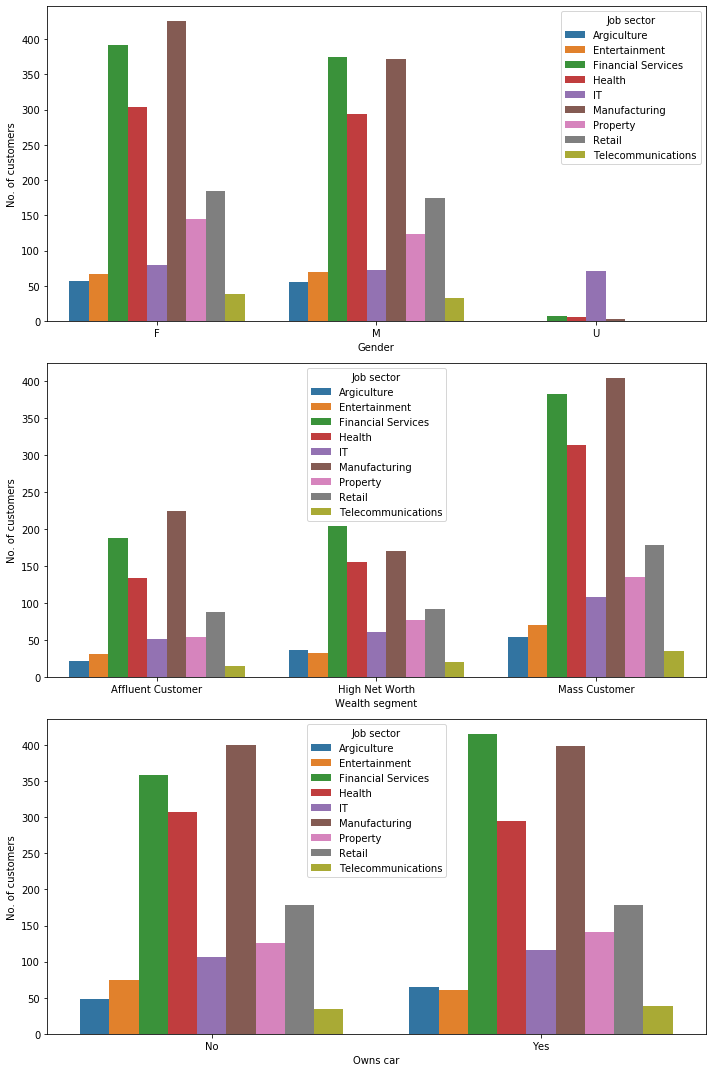

In [24]:
a=3
b=1
c=1
fig = plt.figure(figsize=(10,15))
categorical=['Gender','Wealth segment', 'Owns car']
for i in categorical:
    df4=dfcd.groupby([i,'Job sector']).agg({'Customer ID':'count','Purchase in last 3 years':'sum'}).reset_index()
    plt.subplot(a,b,c)
    sns.barplot(data=df4,x=i,y='Customer ID', hue='Job sector').set(xlabel=i, ylabel='No. of customers')
    c=c+1
plt.tight_layout()
plt.show() 

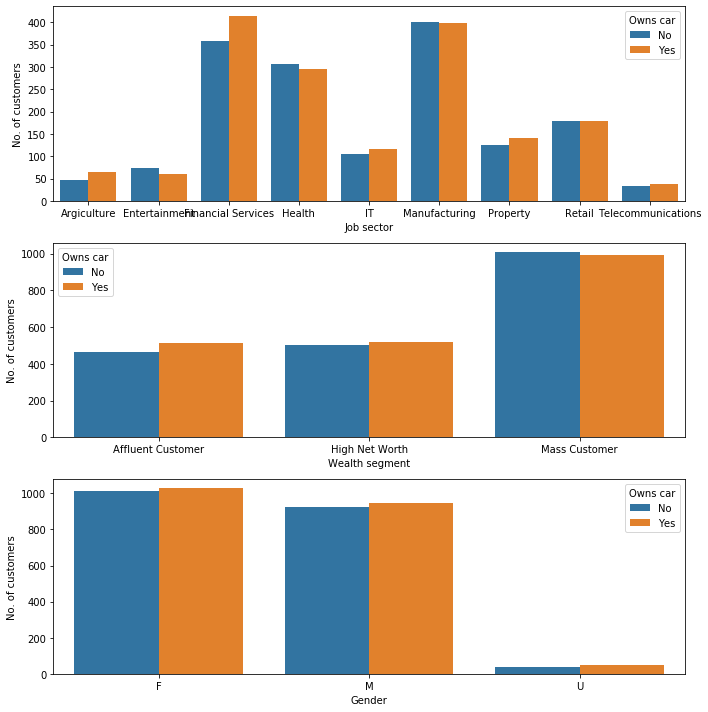

In [25]:
a=3
b=1
c=1
fig = plt.figure(figsize=(10,10))
categorical=['Job sector','Wealth segment', 'Gender']
for i in categorical:
    df4=dfcd.groupby([i,'Owns car']).agg({'Customer ID':'count','Purchase in last 3 years':'sum'}).reset_index()
    plt.subplot(a,b,c)
    sns.barplot(data=df4,x=i,y='Customer ID', hue='Owns car').set(xlabel=i, ylabel='No. of customers')
    c=c+1
plt.tight_layout()
plt.show() 

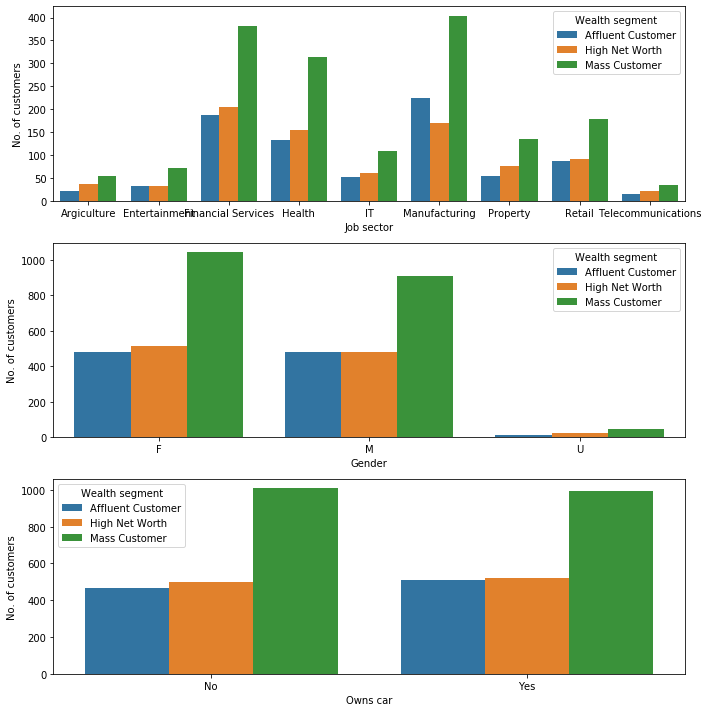

In [26]:
a=3
b=1
c=1
fig = plt.figure(figsize=(10,10))
categorical=['Job sector','Gender', 'Owns car']
for i in categorical:
    df4=dfcd.groupby([i,'Wealth segment']).agg({'Customer ID':'count','Purchase in last 3 years':'sum'}).reset_index()
    plt.subplot(a,b,c)
    sns.barplot(data=df4,x=i,y='Customer ID', hue='Wealth segment').set(xlabel=i, ylabel='No. of customers')
    c=c+1
plt.tight_layout()
plt.show() 

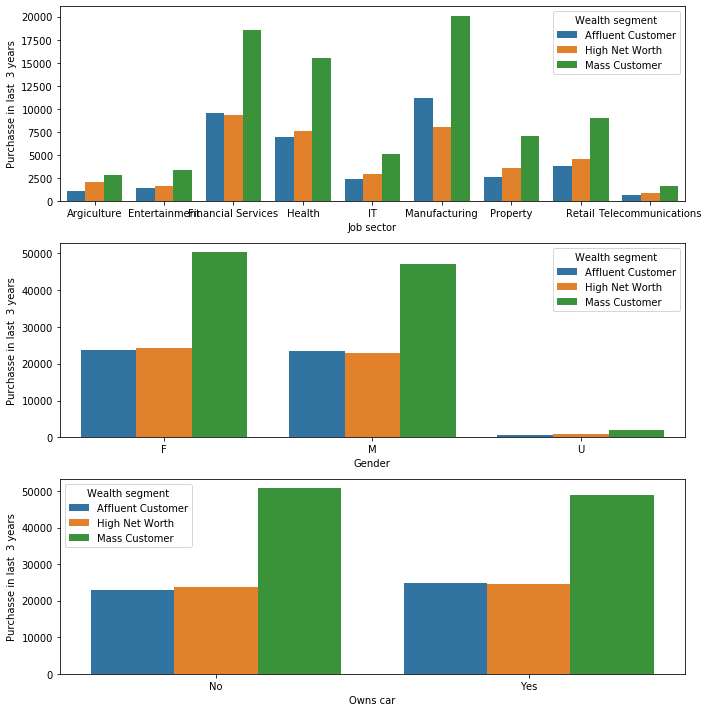

In [111]:
a=3
b=1
c=1
fig = plt.figure(figsize=(10,10))
categorical=['Job sector','Gender', 'Owns car']
for i in categorical:
    df4=dfcd.groupby([i,'Wealth segment']).agg({'Customer ID':'count','Purchase in last 3 years':'sum'}).reset_index()
    plt.subplot(a,b,c)
    sns.barplot(data=df4,x=i,y='Purchase in last 3 years', hue='Wealth segment').set(xlabel=i, ylabel='Purchasse in last  3 years')
    c=c+1
plt.tight_layout()
plt.show() 

## Inserting column 'age' in DataFrame4 based on index in common in both DataFrames

In [74]:
data={'Purchase in last 4 years': ['26536', '34553', '69788', '28610','30428','58246']}
dfToJoin=pd.DataFrame(data)
#dfToJoin=pd.DataFrame(dfcd[['Age','Tenure']].copy())
df5=df4.join(dfToJoin)
#df5.head()
df5

,Owns car,Wealth segment,Customer ID,Purchase in last 3 years,Purchase in last 4 years
0,No,Affluent Customer,467,22838,26536
1,No,High Net Worth,500,23792,34553
2,No,Mass Customer,1008,50684,69788
3,Yes,Affluent Customer,511,24925,28610
4,Yes,High Net Worth,521,24489,30428
5,Yes,Mass Customer,992,48773,58246


## Inserting column 'Age bin' in 'dfcd' DataFrame

In [90]:
df6=dfcd
df6['Age bins']=pd.cut(x=dfcd['Age'], bins=[10,20,30,40,50,60,70,80,90,100])
df6['Age bins'].astype('str')

0       (60.0, 70.0]
1       (40.0, 50.0]
2       (60.0, 70.0]
3       (60.0, 70.0]
4       (40.0, 50.0]
5       (50.0, 60.0]
6       (40.0, 50.0]
7       (50.0, 60.0]
8       (40.0, 50.0]
9       (30.0, 40.0]
10      (60.0, 70.0]
11      (20.0, 30.0]
12      (60.0, 70.0]
13      (30.0, 40.0]
14      (20.0, 30.0]
15      (40.0, 50.0]
16      (50.0, 60.0]
17      (50.0, 60.0]
18      (20.0, 30.0]
19      (40.0, 50.0]
20      (40.0, 50.0]
21      (50.0, 60.0]
22      (20.0, 30.0]
23      (40.0, 50.0]
24      (40.0, 50.0]
25      (40.0, 50.0]
26      (40.0, 50.0]
27      (40.0, 50.0]
28      (50.0, 60.0]
29      (60.0, 70.0]
            ...     
3969    (40.0, 50.0]
3970    (40.0, 50.0]
3971    (50.0, 60.0]
3972    (60.0, 70.0]
3973    (50.0, 60.0]
3974    (60.0, 70.0]
3975    (50.0, 60.0]
3976    (40.0, 50.0]
3977    (40.0, 50.0]
3978    (50.0, 60.0]
3979    (20.0, 30.0]
3980    (50.0, 60.0]
3981    (50.0, 60.0]
3982    (60.0, 70.0]
3983    (20.0, 30.0]
3984    (40.0, 50.0]
3985    (50.0

In [91]:
df6['Tenure bins']=pd.cut(x=dfcd['Tenure'], bins=[0,5,10,15,20,25])
df6['Tenure bins'].astype('str')

0       (10.0, 15.0]
1       (15.0, 20.0]
2       (10.0, 15.0]
3        (5.0, 10.0]
4        (5.0, 10.0]
5       (10.0, 15.0]
6       (10.0, 15.0]
7        (5.0, 10.0]
8        (5.0, 10.0]
9       (15.0, 20.0]
10       (5.0, 10.0]
11       (5.0, 10.0]
12       (5.0, 10.0]
13       (5.0, 10.0]
14        (0.0, 5.0]
15      (15.0, 20.0]
16      (10.0, 15.0]
17      (10.0, 15.0]
18        (0.0, 5.0]
19      (10.0, 15.0]
20      (15.0, 20.0]
21      (10.0, 15.0]
22        (0.0, 5.0]
23      (10.0, 15.0]
24      (20.0, 25.0]
25      (15.0, 20.0]
26      (10.0, 15.0]
27      (20.0, 25.0]
28      (15.0, 20.0]
29       (5.0, 10.0]
            ...     
3969    (15.0, 20.0]
3970     (5.0, 10.0]
3971    (15.0, 20.0]
3972     (5.0, 10.0]
3973    (15.0, 20.0]
3974    (10.0, 15.0]
3975    (15.0, 20.0]
3976      (0.0, 5.0]
3977    (15.0, 20.0]
3978    (10.0, 15.0]
3979      (0.0, 5.0]
3980    (10.0, 15.0]
3981     (5.0, 10.0]
3982     (5.0, 10.0]
3983      (0.0, 5.0]
3984    (20.0, 25.0]
3985     (5.0

In [92]:
df6=dfcd.dropna()
df6.shape

(2630, 16)

In [93]:
df6.head()

,Customer ID,First name,Last name,Gender,Purchase in last 3 years,Birth date,Job title,Job sector,Wealth segment,Deceased indicator,default,Owns car,Tenure,Age,Age bins,Tenure bins
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,"(60, 70]","(10, 15]"
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,41.0,"(40, 50]","(15, 20]"
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68.0,"(60, 70]","(10, 15]"
8,9,Mala,Lind,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,49.0,"(40, 50]","(5, 10]"
9,10,Fiorenze,Birdall,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,34.0,"(30, 40]","(15, 20]"


In [94]:
df6.columns

Index(['Customer ID', 'First name', 'Last name', 'Gender',
       'Purchase in last 3 years', 'Birth date', 'Job title', 'Job sector',
       'Wealth segment', 'Deceased indicator', 'default', 'Owns car', 'Tenure',
       'Age', 'Age bins', 'Tenure bins'],
      dtype='object')

## Grouping and Visualizing Data (One by One) 

In [95]:
df61=df6.groupby(['Age bins']).agg({'Customer ID':'count','Purchase in last 3 years':'sum',
                                 'Job sector':'count','Wealth segment':'count','Owns car':'count'}).reset_index()
df61

,Age bins,Customer ID,Purchase in last 3 years,Job sector,Wealth segment,Owns car
0,"(10, 20]",4,144,4,4,4
1,"(20, 30]",442,22218,442,442,442
2,"(30, 40]",442,22497,442,442,442
3,"(40, 50]",923,45624,923,923,923
4,"(50, 60]",481,23312,481,481,481
5,"(60, 70]",334,15843,334,334,334
6,"(70, 80]",2,65,2,2,2
7,"(80, 90]",1,56,1,1,1
8,"(90, 100]",1,67,1,1,1


[Text(0, 0.5, 'No. of customers'), Text(0.5, 0, 'Age group')]

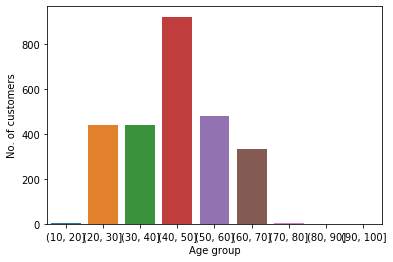

In [98]:
sns.barplot(data=df61,x='Age bins',y='Customer ID').set(xlabel='Age group', ylabel='No. of customers')

## Grouping and visualizing (For loop)

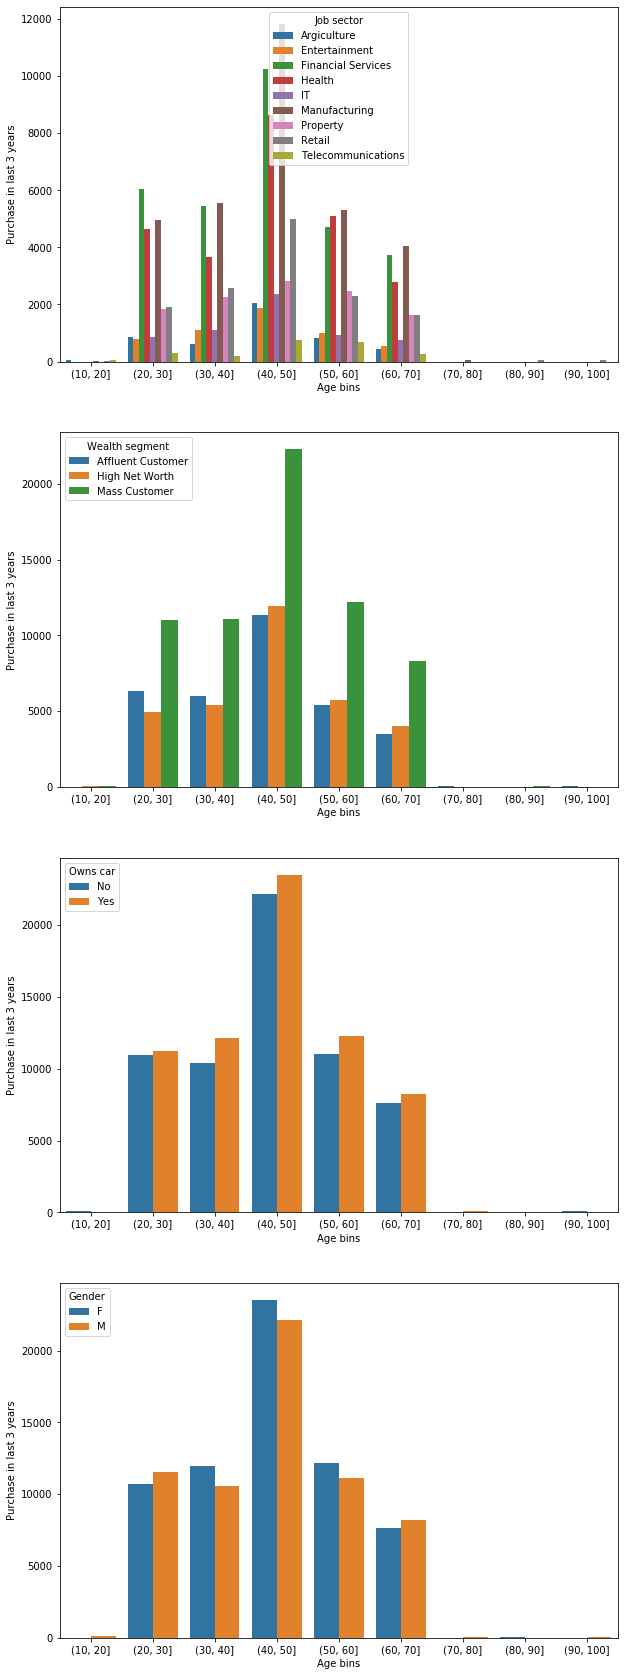

In [112]:
a=4
b=1
c=1
fig=plt.figure(figsize=(10,30))
categories=['Job sector','Wealth segment','Owns car','Gender']
for i in categories:
    df62=df6.groupby([i,'Age bins']).agg({'Customer ID':'count','Purchase in last 3 years':'sum'}).reset_index()
    plt.subplot(a,b,c)
    sns.barplot(data=df62,x='Age bins',y='Purchase in last 3 years', hue=i).set(xlabel='Age bins', ylabel='Purchase in last 3 years')
    c=c+1